In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%cd ../experiments/vgg_lgr_tuning/2021-04-22-16-38

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_lgr_tuning/2021-04-22-16-38


In [3]:
!ls 

1000_1600_0 1000_400_1  2000_200_2  3000_1600_0 3000_400_1  500_200_2
1000_1600_1 1000_400_2  2000_3200_0 3000_1600_1 3000_400_2  500_3200_0
1000_1600_2 1000_800_0  2000_3200_1 3000_1600_2 3000_800_0  500_3200_1
1000_200_0  1000_800_1  2000_3200_2 3000_200_0  3000_800_1  500_3200_2
1000_200_1  1000_800_2  2000_400_0  3000_200_1  3000_800_2  500_400_0
1000_200_2  2000_1600_0 2000_400_1  3000_200_2  500_1600_0  500_400_1
1000_3200_0 2000_1600_1 2000_400_2  3000_3200_0 500_1600_1  500_400_2
1000_3200_1 2000_1600_2 2000_800_0  3000_3200_1 500_1600_2  500_800_0
1000_3200_2 2000_200_0  2000_800_1  3000_3200_2 500_200_0   500_800_1
1000_400_0  2000_200_1  2000_800_2  3000_400_0  500_200_1   500_800_2


In [4]:
a = !ls

In [5]:
class Metrics: 
    def __init__(self, logs): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        return pd.DataFrame(rows, columns=["iters", "g_fc_uni", "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

In [63]:
m = Metrics(a)
df = m.get_metrics_df()
df

,iters,g_fc_uni,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,1000,1600,0.818733,702.400000,18.402479,354.0
1,1000,200,0.817067,686.666667,15.830918,14.0
2,1000,3200,0.845400,727.333333,22.015783,1504.0
3,1000,400,0.813867,691.500000,16.209090,24.0
4,1000,800,0.839900,694.500000,16.411297,138.0
5,2000,1600,0.829333,1412.866667,18.252969,354.0
6,2000,200,0.803767,1412.033333,15.664671,14.0
7,2000,3200,0.848467,1454.533333,21.975654,1504.0
8,2000,400,0.823267,1407.600000,16.228226,24.0
9,2000,800,0.831500,1385.933333,17.021027,138.0


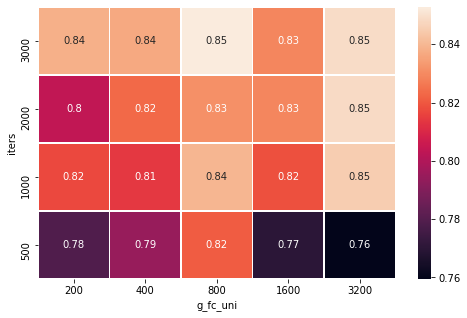

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

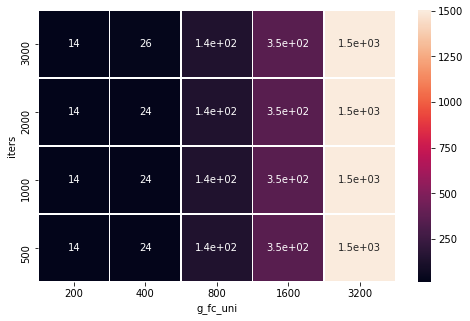

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

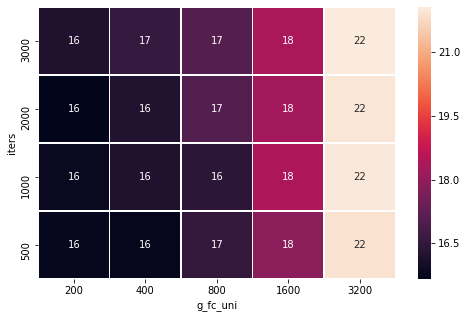

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 